In [57]:
#Unsupervised Learning
#Goal: Discover hidden patterns or groupings in unlabeled data (i.e., data without predefined outcomes).

#Algorithms / Models
#1. Clustering: Used to group similar data points based on features.

#What is K-Means Clustering?
#K-Means is an unsupervised machine learning algorithm used to partition data into K distinct clusters based on similarity.
#Each cluster has a centroid (center point).

#The goal is to minimize the distance between data points and their assigned cluster’s centroid.

#🧠 Key Concept:
#Group similar data points together into K clusters where each point belongs to the nearest centroid.

# K-Means Algorithm Steps:
#Step 1: Choose number of clusters K, Decide how many clusters you want (e.g., 3).
#Step 2: Initialize centroids,Randomly select K data points as initial centroids.
#Step 3: Assign each point to the nearest centroid
         #For each data point: Compute distance to all centroids using Euclidean distance, Assign to the closest one
#Step 4: Update centroids
         #For each cluster:Compute the mean of all points assigned to it, Move the centroid to this mean location
#Step 5: Repeat
         #Repeat steps 3–4 until:Centroids no longer move much (convergence) Or max iterations reached



In [58]:
'''every data point is a 2-D point(x,y).
'''

'every data point is a 2-D point(x,y).\n'

In [59]:
#Loan Predicition project for 
#Dimensionality Reduction → Reduce number of features while keeping important info.

#k-means clustering without stop points

#import libraries
import pandas as pd#pandas (pd): For reading and handling data (like CSV files).
import numpy as np#numpy (np): For numerical operations (not directly used here, but good to have).
import random as rd# This module provides functions for generating random numbers
import matplotlib.pyplot as plt#matplotlib.pyplot (plt): For plotting graphs and visualizing data.
data = pd.read_csv('clustering.csv')#load dataset
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

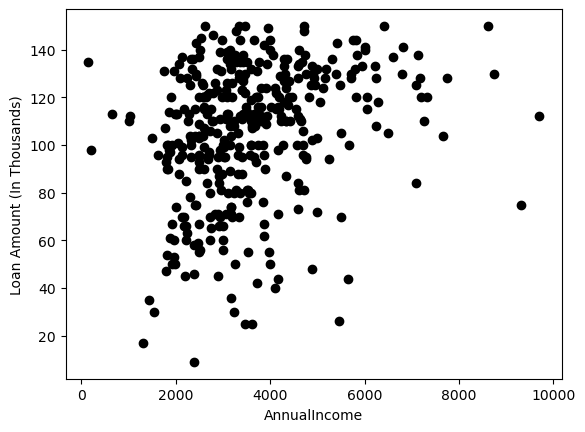

In [60]:
#we will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome.” THese are 2 variables and visualize the data points
X = data[['LoanAmount', 'ApplicantIncome']].copy()#copy() method make sure won't give any garbage value
     # X is a new dataframe consists of loan amt, applicant income variables values.
     #This X will be the input to the clustering algorithm later.
        
        
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')# c stands for color, c='black' makes all points appear in black color.
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

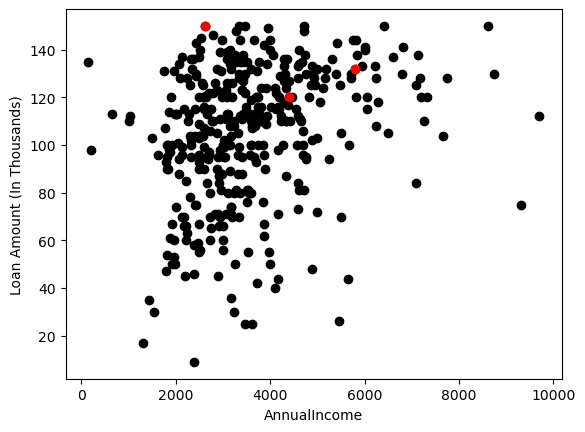

In [61]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3# We want to form 3 clusters

# Select random observation as centroids
Centroids = X.sample(n=K).reset_index(drop=True)# sample(n=K) is a method that randomly picks K rows from the dataset as the starting centroids
   #after sampling centroids takes their original dataset indices(like 10, 237, 502, etc.). but resetting the index gives 0,1,2...

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')# Plot all data points in black, c=color
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')# Plot selected centroids in redplt.figure(figsize=(4, 3))
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

#This is because only these two columns are being used to determine cluster centroids (2D clustering).
#Here, the red dots represent the 3 centroids for each cluster. Note that we have chosen these points randomly, 
#and hence every time you run this code, you might get different centroids.

In [62]:
'''we can alternatively use euclidean()'''

'we can alternatively use euclidean()'

In [63]:
'''
X['Cluster'] = distances.idxmin(axis=1) This says

A concrete mini-example

Imagine the (conceptual) distances table for 5 points looks like this:

           this is 1st iteration
| point | to c0 | to c1 | to c2 | `idxmin(axis=1)` → cluster |
| ----: | ----: | ----: | ----: | :------------------------- |
|    p1 | 105.0 | 300.0 | 210.0 | 0                          |
|    p2 | 520.1 | 110.3 | 110.3 | 1  *(tie → first minimum)* |
|    p3 | 800.0 | 400.0 | 500.0 | 1                          |
|    p4 |  50.0 |  60.0 |  40.0 | 2                          |
|    p5 |   NaN |  20.0 |  10.0 | 2  *(NaNs skipped)*        |

and it goes upto 2 more iterations bcz we assumed k=3


Ties: If two (or three) distances are exactly equal minima, idxmin returns the first minimum by column order—here that means the smallest centroid label among the ties (e.g., chooses 1 over 2).
Missing values: By default idxmin skips NaNs (skipna=True). If all three were NaN for a row (rare here), the result would be NaN.

-> Assigning it to X['Cluster'] stores the nearest-centroid index for each point.
'''

"\nX['Cluster'] = distances.idxmin(axis=1) This says\n\nA concrete mini-example\n\nImagine the (conceptual) distances table for 5 points looks like this:\n\n           this is 1st iteration\n| point | to c0 | to c1 | to c2 | `idxmin(axis=1)` → cluster |\n| ----: | ----: | ----: | ----: | :------------------------- |\n|    p1 | 105.0 | 300.0 | 210.0 | 0                          |\n|    p2 | 520.1 | 110.3 | 110.3 | 1  *(tie → first minimum)* |\n|    p3 | 800.0 | 400.0 | 500.0 | 1                          |\n|    p4 |  50.0 |  60.0 |  40.0 | 2                          |\n|    p5 |   NaN |  20.0 |  10.0 | 2  *(NaNs skipped)*        |\n\nand it goes upto 2 more iterations bcz we assumed k=3\n\n\nTies: If two (or three) distances are exactly equal minima, idxmin returns the first minimum by column order—here that means the smallest centroid label among the ties (e.g., chooses 1 over 2).\nMissing values: By default idxmin skips NaNs (skipna=True). If all three were NaN for a row (rare here), 

In [64]:
'''
-> X.groupby('Cluster')
At this point, X has an extra column "Cluster" (from your earlier step: X['Cluster'] = distances.idxmin(axis=1)).
So every row (data point) now has a cluster label: 0, 1, or 2 (since K=3).
groupby('Cluster') groups all the rows by their assigned cluster.

Cluster  LoanAmount  ApplicantIncome
0        120         4000
0        150         4200
1        250         7000
2        200         5000
2        210         5200
Here cluster 0 has 2 points, cluster 1 has 1 point, cluster 2 has 2 points.

-> [['LoanAmount', 'ApplicantIncome']]
Select only the features (the numeric columns we are clustering on).
We ignore the "Cluster" column here because we only need feature values to compute centroids.

->.mean()
For each cluster group, compute the mean of LoanAmount and the mean of ApplicantIncome.
These means give the new centroid position for that cluster:
So if cluster 0 has 2 points (120,4000) and (150,4200):
New LoanAmount = (120+150)/2=135
New ApplicantIncome = (4000+4200)/2=4100

->.reset_index(drop=True)
After .mean(), the cluster labels (0,1,2) become the index of the resulting DataFrame.
reset_index(drop=True) resets that index back to 0,1,2 so you can use .loc[i, ...] later without mismatches.


Example Output

For the tiny example above, new_centroids would look like:
| LoanAmount | ApplicantIncome |
| ---------- | --------------- |
| 135.0      | 4100.0          |
| 250.0      | 7000.0          |
| 205.0      | 5100.0          |
Row 0 = new centroid for cluster 0
Row 1 = new centroid for cluster 1
Row 2 = new centroid for cluster 2

You repeat this until the centroids stop moving → convergence.
'''

'\n-> X.groupby(\'Cluster\')\nAt this point, X has an extra column "Cluster" (from your earlier step: X[\'Cluster\'] = distances.idxmin(axis=1)).\nSo every row (data point) now has a cluster label: 0, 1, or 2 (since K=3).\ngroupby(\'Cluster\') groups all the rows by their assigned cluster.\n\nCluster  LoanAmount  ApplicantIncome\n0        120         4000\n0        150         4200\n1        250         7000\n2        200         5000\n2        210         5200\nHere cluster 0 has 2 points, cluster 1 has 1 point, cluster 2 has 2 points.\n\n-> [[\'LoanAmount\', \'ApplicantIncome\']]\nSelect only the features (the numeric columns we are clustering on).\nWe ignore the "Cluster" column here because we only need feature values to compute centroids.\n\n->.mean()\nFor each cluster group, compute the mean of LoanAmount and the mean of ApplicantIncome.\nThese means give the new centroid position for that cluster:\nSo if cluster 0 has 2 points (120,4000) and (150,4200):\nNew LoanAmount = (120+15

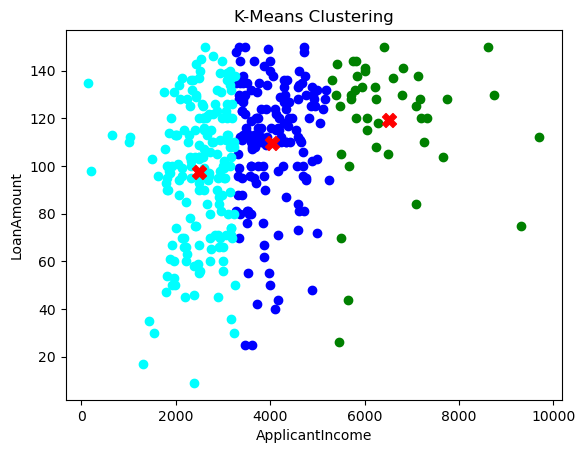

In [65]:
#Next, we will define some conditions to implement the K-Means Clustering algorithm.
# Step 3 - Assign all the points to the closest cluster centroid

# K-Means loop (until centroids stop changing)

while True:
    # Assign points to nearest centroid
    distances = pd.DataFrame({i: np.sqrt((X['ApplicantIncome'] - Centroids.loc[i, 'ApplicantIncome'])**2 +
                                         (X['LoanAmount'] - Centroids.loc[i, 'LoanAmount'])**2)
                              for i in range(K)})
    X['Cluster'] = distances.idxmin(axis=1)
    
    #After this line runs, X['Cluster'] is filled with 0/1/2, telling you which centroid each point currently belongs to. 
    
    
# Step 4 - Recompute centroids of newly formed clusters    
    # Compute new centroids
    new_centroids = X.groupby('Cluster')[['LoanAmount', 'ApplicantIncome']].mean().reset_index(drop=True)
    #group by is a method is used to arrange all data points in the form of table that belong to same cluster then calculates mean of 2 variables from dataframe
  

 # Step 5 - Repeat step 3 and 4
    # Stop if centroids do not change
    if new_centroids.equals(Centroids):
        break
    Centroids = new_centroids

'''After assigning clusters, you compute new centroids (new_centroids). You compare them with the old centroids (Centroids).
If they’re exactly the same, the algorithm has converged → break out of the loop. Otherwise, update and repeat.'''    

# Plot final clusters
colors = ['blue', 'green', 'cyan']
for k in range(K):
    cluster_data = X[X['Cluster'] == k]
    plt.scatter(cluster_data['ApplicantIncome'], cluster_data['LoanAmount'], c=colors[k])
plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'], c='red', marker='X', s=100)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('K-Means Clustering')
plt.show()

F-statistic: 15.286971471158584
p-value: 4.1285194703318804e-07
Result: Reject the null hypothesis. At least one cluster has a significantly different mean LoanAmount.


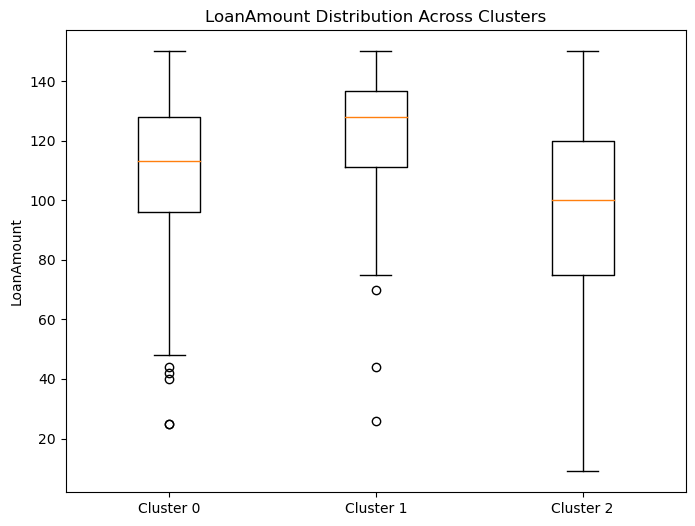

In [66]:
# -----------------------------
# ANOVA on K-Means Clusters
# -----------------------------

import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Assuming 'X' already contains 'LoanAmount', 'ApplicantIncome' and 'Cluster'

# Step 1: Separate LoanAmount values for each cluster
cluster_0 = X[X['Cluster'] == 0]['LoanAmount']
cluster_1 = X[X['Cluster'] == 1]['LoanAmount']
cluster_2 = X[X['Cluster'] == 2]['LoanAmount']

# Step 2: Perform one-way ANOVA
F_statistic, p_value = f_oneway(cluster_0, cluster_1, cluster_2)

# Step 3: Print the ANOVA results
print("F-statistic:", F_statistic)
print("p-value:", p_value)

# Step 4: Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. At least one cluster has a significantly different mean LoanAmount.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in mean LoanAmount across clusters.")

# Optional: Visualize LoanAmount distribution across clusters
plt.figure(figsize=(8,6))
plt.boxplot([cluster_0, cluster_1, cluster_2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.ylabel('LoanAmount')
plt.title('LoanAmount Distribution Across Clusters')
plt.show()


F-statistic: 15.286971471158584
p-value: 4.1285194703318804e-07
Reject H0: At least one cluster has a significantly different mean LoanAmount


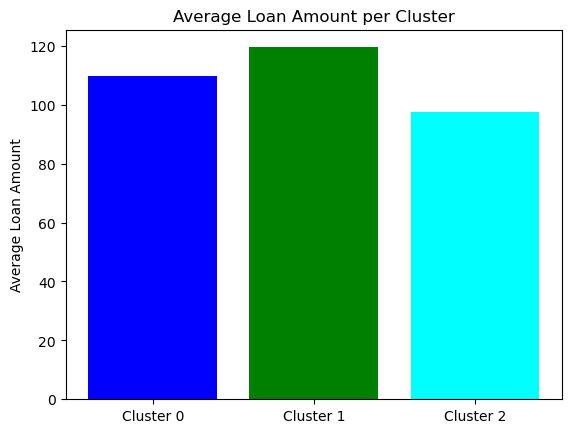

In [67]:
# -------------------------------
# ANOVA on K-Means Clusters
# -------------------------------

import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Assume X already has clusters from K-Means
# X['Cluster'] contains cluster labels

# Separate the data by clusters
cluster_0 = X[X['Cluster'] == 0]['LoanAmount']
cluster_1 = X[X['Cluster'] == 1]['LoanAmount']
cluster_2 = X[X['Cluster'] == 2]['LoanAmount']

# Perform one-way ANOVA
# H0: All clusters have the same mean LoanAmount
# H1: At least one cluster has a different mean LoanAmount
F_statistic, p_value = f_oneway(cluster_0, cluster_1, cluster_2)

print("F-statistic:", F_statistic)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject H0: At least one cluster has a significantly different mean LoanAmount")
else:
    print("Fail to reject H0: No significant difference in LoanAmount between clusters")

# Optional: visualize cluster means
plt.bar(['Cluster 0', 'Cluster 1', 'Cluster 2'],
        [cluster_0.mean(), cluster_1.mean(), cluster_2.mean()],
        color=['blue', 'green', 'cyan'])
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount per Cluster')
plt.show()


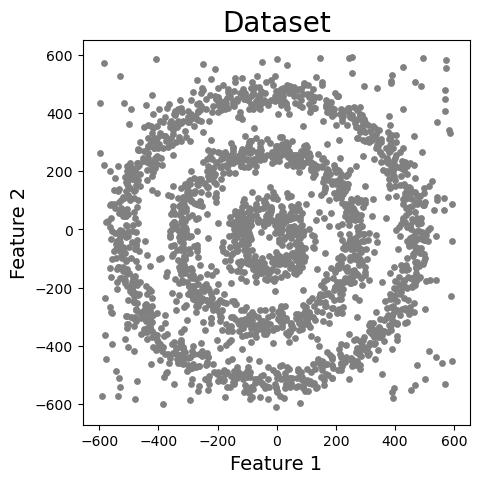

In [68]:
# DBSCAN Clustering
import numpy as np#numeric operations, random numbers, arrays.
import pandas as pd#DataFrame handling.
import math# for cos, sin, and pi. (numpy also has these but you used math.)
import matplotlib.pyplot as plt#plotting.
import matplotlib#imported but not used directly here (fine to keep).

np.random.seed(42)#Fixes the random number generator so runs are reproducible. Every time you run the code with seed 42, the same random numbers will be produced.



# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
    return [
        (
            math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30),# X-coordinate
            math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30) # Y-coordinate
        )
        for x in range(1, n + 1)
    ]
"""
    r : radius of the circle
    n : number of points to generate
    
    For each point:
    - Compute (x, y) coordinates using cosine & sine
    - Add Gaussian noise (mean ~ -30, std dev ~ 30) so points are not perfectly circular
"""
# Creating data points in the form of concentric circles
df1 = pd.DataFrame(PointsInCircum(500, 1000))# Outer circle
df2 = pd.DataFrame(PointsInCircum(300, 700))# Middle circle
df3 = pd.DataFrame(PointsInCircum(100, 300))# Inner circle

# Adding random noise points
df_noise = pd.DataFrame([
    (np.random.randint(-600, 600), np.random.randint(-600, 600))# Uniform random integers
    for _ in range(300) # Number of noise points

])

# Combine all datasets
df = pd.concat([df1, df2, df3, df_noise], ignore_index=True)
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],s=15,color='grey')# Scatter plot of all points
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [69]:
#K-Means vs. Hierarchical vs. DBSCAN Clustering
#K-Means #the easiest clustering algorithm
from sklearn.cluster import KMeans# Import KMeans from scikit-learn
k_means=KMeans(n_clusters=4,random_state=42)# Initialize KMeans with 4 clusters and a fixed random seed for reproducibility
k_means.fit(df[[0,1]])# Fit the KMeans model on the first two columns of the dataframe

df['KMeans_labels']=k_means.labels_# Store the predicted cluster labels in a new column
# Plotting resulting clusters
colors=['purple','red','blue','green']# Define colors for each cluster
plt.figure(figsize=(10,10))# Set figure size
plt.scatter(df[0],df[1],# Plot data points (Feature 1 vs Feature 2)
            c=df['KMeans_labels'], # Color by cluster label
            cmap=matplotlib.colors.ListedColormap(colors),# Custom color mapping
            s=15)         # Point size
plt.title('K-Means Clustering',fontsize=20)# Plot title
plt.xlabel('Feature 1',fontsize=14)# Plot title
plt.ylabel('Feature 2',fontsize=14)# Y-axis label
plt.show() # Display the plot

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


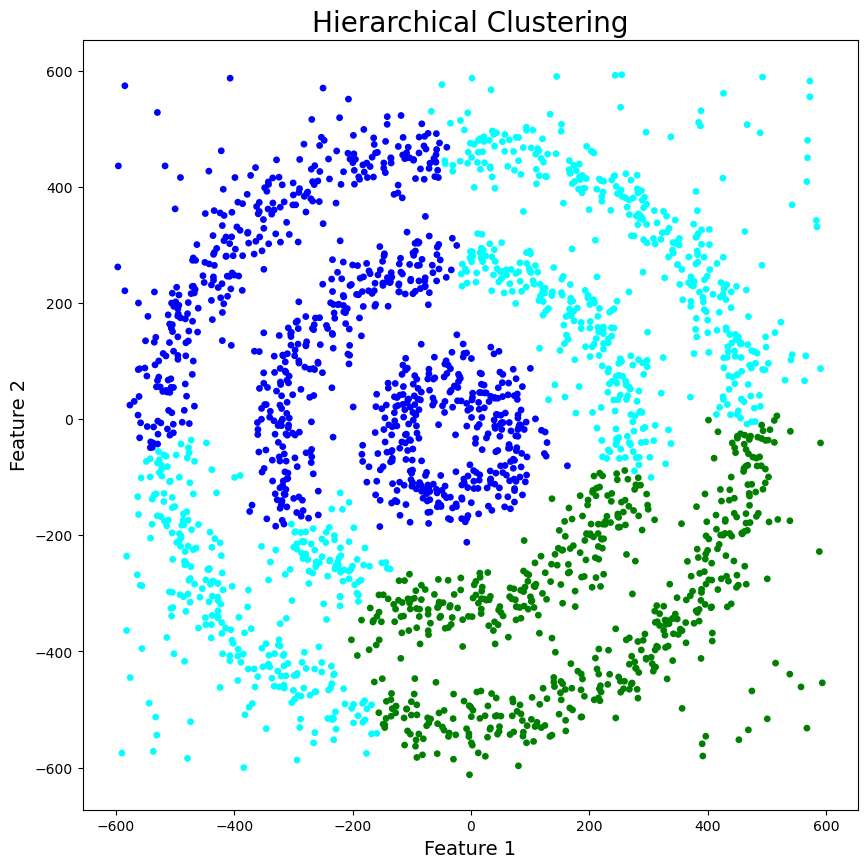

In [70]:
#2. Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering # Import Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')# Create the model with 4 clusters using Euclidean distance
model.fit(df[[0,1]])# Fit the model on the first two columns of df

df['HR_labels']=model.labels_# Add the predicted cluster labels to the dataframe

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()



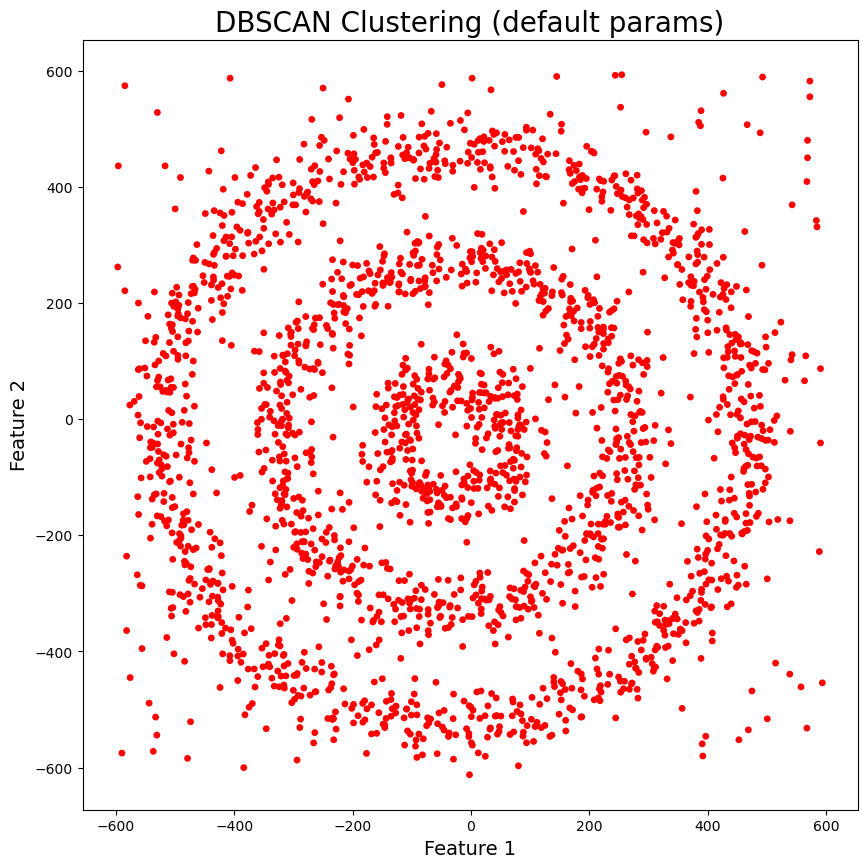

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Make sure 'df' is your DataFrame with columns 0 and 1 containing features

# Define colors for plotting clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'cyan', 'magenta']

# ------------------------
# 1. Initial DBSCAN clustering (default parameters)
dbscan = DBSCAN()
dbscan.fit(df[[0, 1]])

# Assign cluster labels to DataFrame
df['DBSCAN_labels'] = dbscan.labels_

# Plotting the initial clusters
plt.figure(figsize=(10, 10))
plt.scatter(
    df[0], df[1],
    c=df['DBSCAN_labels'],
    cmap=matplotlib.colors.ListedColormap(colors),
    s=15
)
plt.title('DBSCAN Clustering (default params)', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

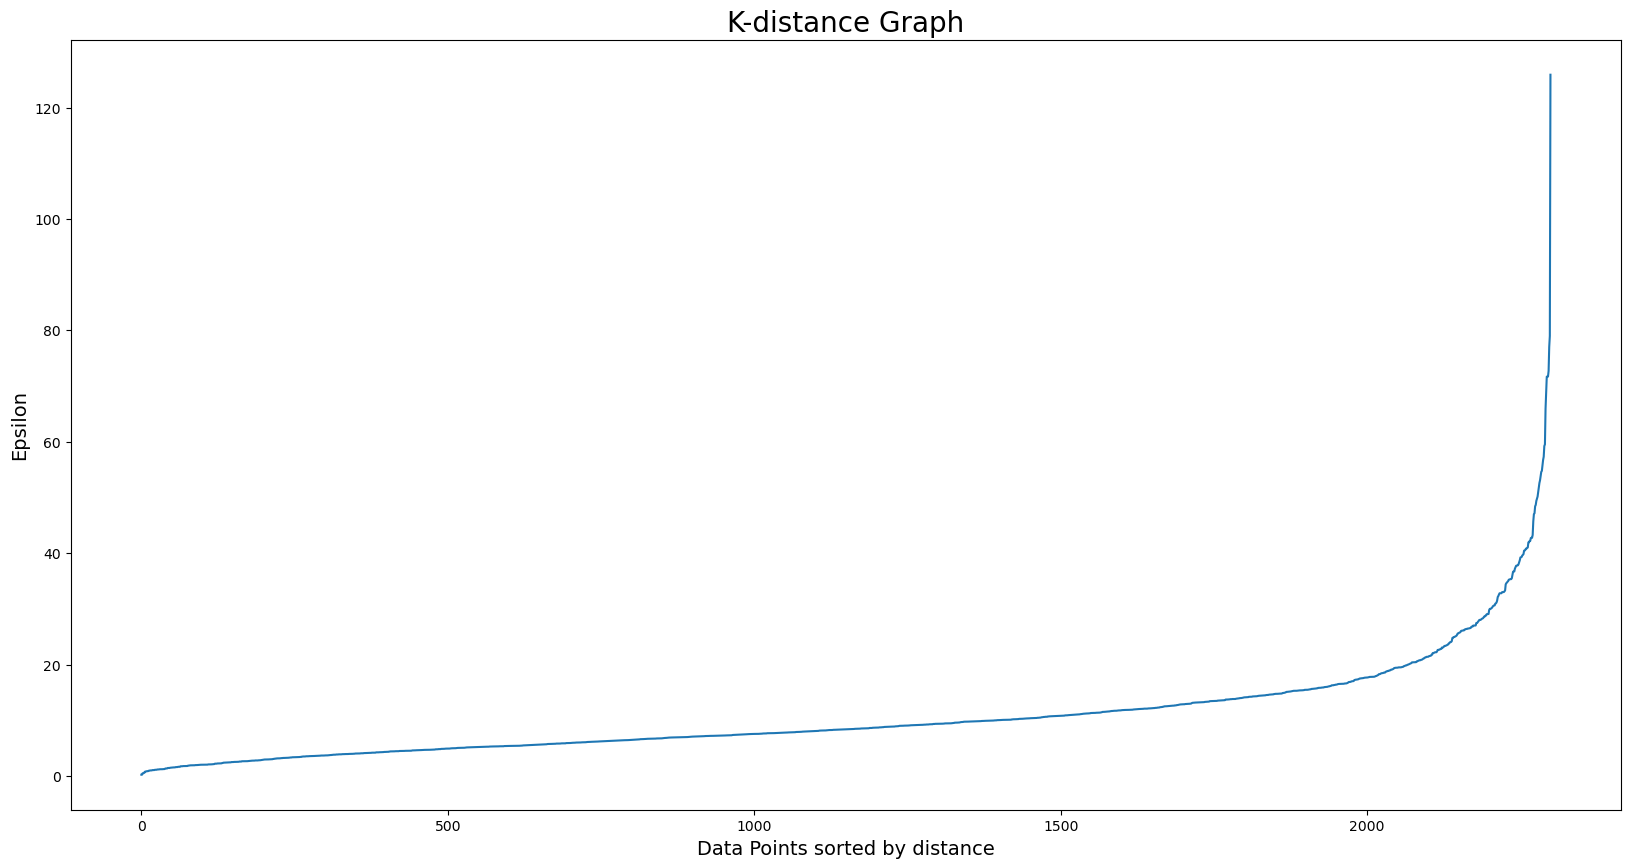

In [72]:
# ------------------------
# 2. Compute K-distance graph to find optimal eps

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0, 1]])
distances, indices = nbrs.kneighbors(df[[0, 1]])

# Sort distances and take the second nearest neighbor distance for each point
distances = np.sort(distances[:, 1])

plt.figure(figsize=(20, 10))
plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [73]:
# ------------------------
# 3. Optimized DBSCAN clustering with chosen eps and min_samples

dbscan_opt = DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0, 1]])

# Assign optimized cluster labels to DataFrame
df['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Show count of points in each cluster including noise (-1 label)
print(df['DBSCAN_opt_labels'].value_counts())

DBSCAN_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64


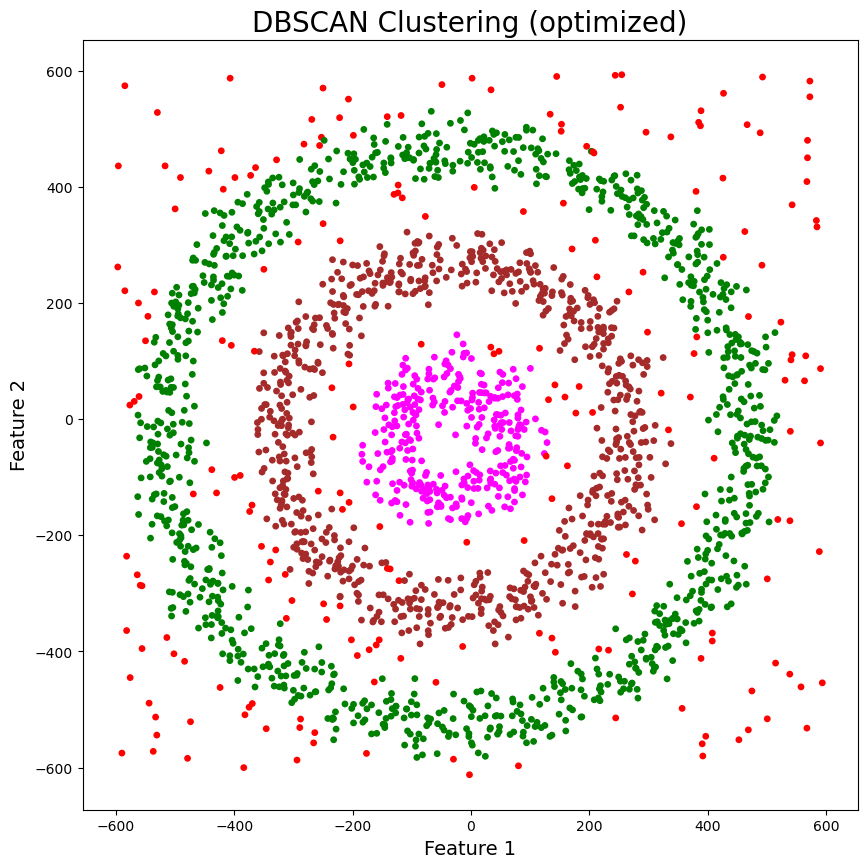

In [74]:
# Plotting the optimized clusters
plt.figure(figsize=(10, 10))
plt.scatter(
    df[0], df[1],
    c=df['DBSCAN_opt_labels'],
    cmap=matplotlib.colors.ListedColormap(colors),
    s=15
)
plt.title('DBSCAN Clustering (optimized)', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [ ]:
#PCA

In [ ]:
#Dimensionality Reduction → Reduce number of features while keeping important info.

#pca
# Import core libraries
import numpy as np # For numerical computations and arrays
import pandas as pd # For data handling and CSV file operations
# Import sklearn modules
from sklearn import datasets # Access to datasets (though here you load CSV manually)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Visualization libraries
import seaborn as sns
sns.set()            # Apply Seaborn's default style for plots
import matplotlib.pyplot as plt
# For working with file paths (not used yet)
import os
# Load the Iris dataset from CSV
iris_data = pd.read_csv("Iris.csv",index_col='Id') #“Id” column as the index, removing it from the feature columns.


In [ ]:
print(iris_data)

In [ ]:
#Univariate EDA
iris_data.info()

In [ ]:
iris_data.describe()

In [ ]:
iris_data.head()

In [ ]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [ ]:
iris_data.head()

In [ ]:
!pip install missingno


In [ ]:
#To see which columns have missing data and how much.
import missingno as msno
p=msno.bar(iris_data)

In [ ]:
sns.countplot(y=iris_data.Species ,data=iris_data)#Puts the target classes (Setosa, Versicolor, Virginica) on the Y-axis.
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

"""Early Insights :¶
150 rows
4 Independent variables to act as factors
All have same units of measurement (cm)
No missing data
Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
No class imbalance, all target classes have equal number of rows (50 each)."""

In [ ]:
#Bivariate EDA
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns) -1): # Exclude 'Species' column
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
        # Create a boxplot of the feature grouped by Species
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")  # Not needed here, as it would apply to all subplots
plt.show()
plt.show()


In [ ]:
p=sns.pairplot(iris_data, hue = 'Species')

"""sns.pairplot() plots scatterplots for every pair of features (and histograms or KDE plots on the diagonal).
hue='Species' colors points by the species class, so you can see how different species separate in feature space.
Helps spot clusters, correlations, and feature importance visually.

Pairplots help you understand your data’s structure and relationships visually, which is crucial before building any machine learning model.
"""

In [ ]:
plt.figure(figsize=(4,4))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

'''The heatmap displays how strongly pairs of features move together linearly:
A correlation value close to +1 means the two features increase together (strong positive relationship).
A correlation value close to -1 means one feature increases while the other decreases (strong negative relationship).
A correlation value around 0 means no linear relationship between the features.
This helps you understand which features are related and can influence your model-building decisions.'''

In [ ]:
'''One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features'''

In [ ]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

'''iris_data.hist()
Automatically creates histograms for all numeric columns in your DataFrame.
Each histogram shows the distribution (frequency of values) of a feature.

figsize=(15,12)
Sets the overall figure size (width 15 inches, height 12 inches) so the histograms are clear and well spaced.

bins=15
Divides the data range into 15 bins (bars) for each histogram — controlling the granularity of the distribution.'''

In [ ]:
'''The histogram distributions don't seem to be ideal.'''

In [ ]:
#Modelling
#1. Without PCA(Here we are using KNN)
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
# Scale the features to a range between 0 and 1
# This is important for KNN because it is distance-based, and unscaled features
# could bias the results if they have different units or magnitudes


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)
# - stratify=y ensures each set has proportional representation of classes

knn = KNeighborsClassifier(7)# Create a KNN classifier with k=7 (number of neighbors)
knn.fit(X_train,y_train)# Train the KNN model on the training data

print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

In [ ]:
# 2. With PCA
from sklearn.decomposition import PCA

# Initialize PCA without limiting components (it will keep all)
pca = PCA()

# Fit PCA on the scaled feature matrix X and transform it to new principal components
X_new = pca.fit_transform(X)

# Get the covariance matrix of the principal components
pca.get_covariance()

# Get the proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratios
explained_variance

# Visualization of variance explained by each principal component
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    # Create a bar plot showing how much variance each PC explains
    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')

    # Label the axes
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')

    # Add a legend
    plt.legend(loc='best')
    plt.tight_layout()


In [ ]:
# 2. With PCA
pca = PCA(n_components=3)   # Create a PCA object to reduce features to 3 principal components
X_new = pca.fit_transform(X) # Fit PCA on the original scaled features and transform them into new components

# Splitting the reduced feature set into training and testing data
X_train_new, X_test_new, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=20, stratify=y
)

# Initializing KNN with k=7
knn_pca = KNeighborsClassifier(7)

# Training the model on the PCA-reduced data
knn_pca.fit(X_train_new, y_train)

# Checking the accuracy on training and test sets
print("Train score after PCA", knn_pca.score(X_train_new, y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new, y_test), "%")





In [ ]:
# Visualising the Test set results
classifier = knn_pca  # Assign the trained classifier for plotting

# Preparing meshgrid for plotting decision boundaries (only using PC1 and PC2 for visualization)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predicting class for each point in meshgrid while keeping PC3 fixed at zero
plt.contourf(
    X1, X2,
    classifier.predict(
        np.array([X1.ravel(), X2.ravel(), np.zeros((X1.shape[0], X1.shape[1])).ravel()]).T
    ).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('pink', 'lightgreen'))
)

# Setting plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the actual test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )

# Adding labels and legend
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
#3. Reinforcement Learning Definition: An agent learns by interacting with an environment, receiving rewards or penalties for its actions.
#Goal: Learn a policy that maximizes cumulative reward over time.

#Q-Learning
#Deep Q-Networks (DQN)
#Policy Gradient Methods
#Use cases: Game playing (Chess, Go), robotics, self-driving cars